# Correlation between number of spikes and song features (entropy, entropy variance, fundamental frequency)

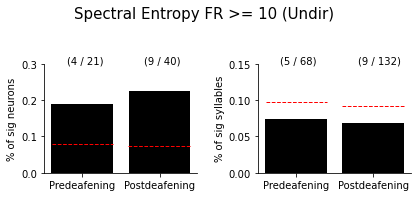

0.032
0.032


In [3]:
nb_note_crit = 10
fr_crit = 10
# csv_path = r'H:\Box\Data\Deafening Project\Analysis\EntropySpkCorrNew\spectral_entropy new_window.csv'
# csv_path = r'H:\Box\Data\Deafening Project\Analysis\EntropySpkCorrNew\spectro_temporal_entropy new_window.csv'
csv_path = r'C:\Users\jahn02\Box\Data\Deafening Project\Analysis\EntropySpkCorrNew\ev new_window.csv'
df = pd.read_csv(csv_path, index_col='syllableID')
df = df.query(f"nbNoteUndir >= {nb_note_crit} and premotorFRUndir >= {fr_crit}" )

# Get proportion of neurons showing significant correlation per task
title = 'Spectral Entropy'  # {'Spectro-temporal Entropy', 'Spectral Entropy', 'EV'}
total_neurons = {}
sig_neurons = {}
sig_prop = {}

# Plot the results
fig, ax = plt.subplots(figsize=(6, 3))
plt.suptitle(f'{title} FR >= {fr_crit} (Undir) ', y=.9, fontsize=15)
ax = plt.subplot2grid((4, 2), (1, 0), rowspan=3, colspan=1)

# Calculate sig neuronal proportion
df_corr_sig = df.groupby(['clusterID','taskName'])['spkCorrSigUndir'].sum().reset_index()
df_shuffled_sig = df.groupby(['clusterID','taskName'])['shuffledSigPropUndir'].mean().reset_index()
tasks = sorted(set(df['taskName']), reverse=True)
for ind, task in enumerate(tasks):
    sig_array = df_corr_sig[(df_corr_sig['taskName'] == task)]['spkCorrSigUndir']
    shuffled_sig_array = df_shuffled_sig[(df_shuffled_sig['taskName'] == task)]['shuffledSigPropUndir']
    baseline_prop = shuffled_sig_array.mean() + (2*shuffled_sig_array.std())
    total_neurons[task] = len(sig_array)
    sig_neurons[task] = (sig_array >= 1).sum()
    sig_prop[task] = (sig_array >= 1).sum() / len(sig_array)
    ax.bar(ind, sig_prop[task], color='k')
    ax.set_ylabel('% of sig neurons')
    ax.set_ylim([0, 0.3])
    ax.set_xticks([0, 1])
    ax.set_xticklabels(tasks)
    ax.text(ind-0.20, ax.get_ylim()[-1], f'({sig_neurons[task]} / {total_neurons[task]})', c='k')
    # Mark baseline proportion
    if ind == 0:
        ax.axhline(y=baseline_prop,
                   xmin=ind+0.05, xmax=ind+0.45,
                   color='r', ls='--', lw=1)
    else:
        ax.axhline(y=baseline_prop,
                   xmin=ind-0.05, xmax=ind-0.45,
                   color='r', ls='--', lw=1)
    remove_right_top(ax)

# Calculate sig syllables
total_syllables = {}
sig_syllables = {}
sig_prop = {}

ax = plt.subplot2grid((4, 2), (1, 1), rowspan=3, colspan=1)
for ind, task in enumerate(tasks):
    sig_array = df[(df['taskName'] == task)]['spkCorrSigUndir']
    shuffled_sig_array = df[(df['taskName'] == task)]['shuffledSigPropUndir']
    baseline_prop = shuffled_sig_array.mean() + (2*shuffled_sig_array.std())
#     print(baseline_prop)
    total_syllables[task] = len(sig_array)
    sig_syllables[task] = (sig_array >= 1).sum()
    sig_prop[task] = (sig_array >= 1).sum() / len(sig_array)
    ax.bar(ind, sig_prop[task], color='k')
    ax.set_ylabel('% of sig syllables')
    ax.set_ylim([0, 0.15])
    ax.set_xticks([0, 1])
    ax.set_xticklabels(tasks)
    ax.text(ind-0.2, ax.get_ylim()[-1], f'({sig_syllables[task]} / {total_syllables[task]})', c='k')
    # Mark baseline proportion
    if ind == 0:
        ax.axhline(y=baseline_prop,
                   xmin=ind+0.05, xmax=ind+0.45,
                   color='r', ls='--', lw=1)
    else:
        ax.axhline(y=baseline_prop,
                   xmin=ind-0.05, xmax=ind-0.45,
                   color='r', ls='--', lw=1)
    remove_right_top(ax)
    
plt.tight_layout()
plt.show()

# Proportion Z-test
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([2, 14])
nobs = np.array([21, 40])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))

# Fisher's exact test
from scipy.stats import fisher_exact
oddsratio, pvalue = fisher_exact([[2, 25], [21, 40]])
print('{0:0.3f}'.format(pval))

## Plot significance scatter plot

- Correlation between # of spikes and song features (e.g., entropy, spectro-temporal entropy, entropy variance, etc)
- Mark syllables where there was a significant correlation (filled circle for significant, emtpy circle for non-significant)

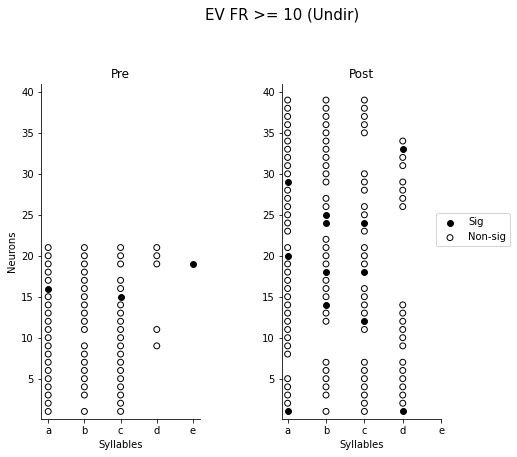

In [4]:
# Map note to numbers
import pandas as pd

feature = 'EV'
nb_note_crit = 10
fr_crit = 10
# csv_path = r'H:\Box\Data\Deafening Project\Analysis\EntropySpkCorr\spectro_temporal_entropy\spectro_temporal_entropy.csv'
# # csv_path = r'H:\Box\Data\Deafening Project\Analysis\EntropySpkCorr\spectral_entropy\spectral_entropy.csv'
csv_path = r'C:\Users\jahn02\Box\Data\Deafening Project\Analysis\EntropySpkCorr\ev\ev.csv'
df = pd.read_csv(csv_path, index_col='syllableID')
df = df.query(f"nbNoteUndir >= {nb_note_crit} and premotorFRUndir >= {fr_crit}" )

note_dict = {}
for ind, note in enumerate(sorted(df['note'].unique())):
    note_dict[note] = ind+1

# Plot the results
circ_size = 35

fig, ax = plt.subplots(figsize=(8, 7))
plt.suptitle(f'{feature} FR >= {fr_crit} (Undir) ', y=.9, fontsize=15)

for ind, task in enumerate(sorted(df['taskName'].unique(), reverse=True)):
    ax = plt.subplot2grid((5, 5), (1, ind*2), rowspan=4, colspan=2)
    task_df = df[(df['taskName'] == task)]

    for y_loc, cluster in enumerate(task_df['clusterID'].unique()):
        temp_df = task_df[(task_df['clusterID'] == cluster)]
        for note in temp_df['note'].unique():
            corr_sig = temp_df[(temp_df['note'] == note)]['spkCorrSigUndir'].to_numpy(dtype=int)
            if corr_sig:
                ax.scatter(note_dict[note], y_loc+1, s=circ_size, color='k')
            else:
                ax.scatter(note_dict[note], y_loc+1, s=circ_size, facecolors='none', color='k')

    ax.set_xticks(range(1, 6))
    ax.set_xticklabels(sorted(df['note'].unique()))
    ax.set_ylim([0.1, 41])
    if ind == 0:
        ax.set_ylabel('Neurons')
        ax.set_title('Pre')

    if ind == 1:
        ax.set_title('Post')
        ax.legend(['Sig', 'Non-sig'], loc='lower center', bbox_to_anchor=(1.2, 0.5))
        # set spacing to subplots
        fig.tight_layout()
    ax.set_xlabel('Syllables')
    remove_right_top(ax)

plt.show()